# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


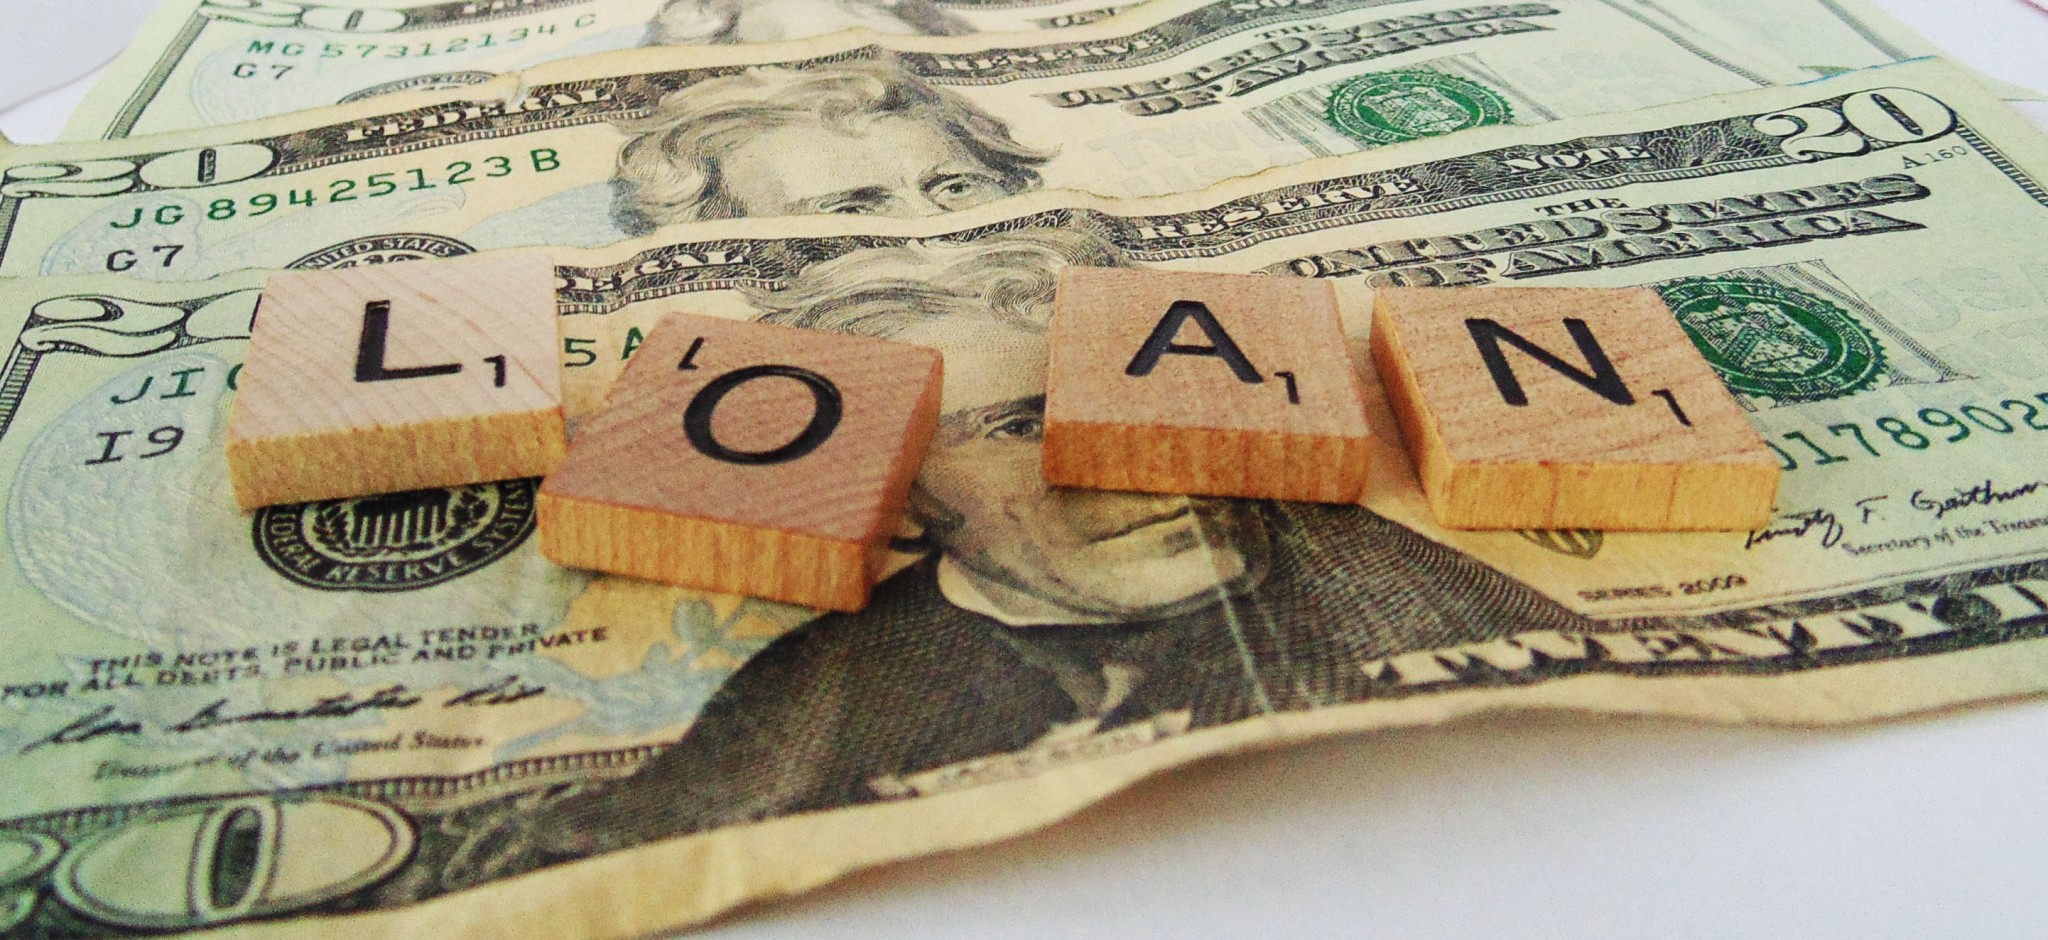

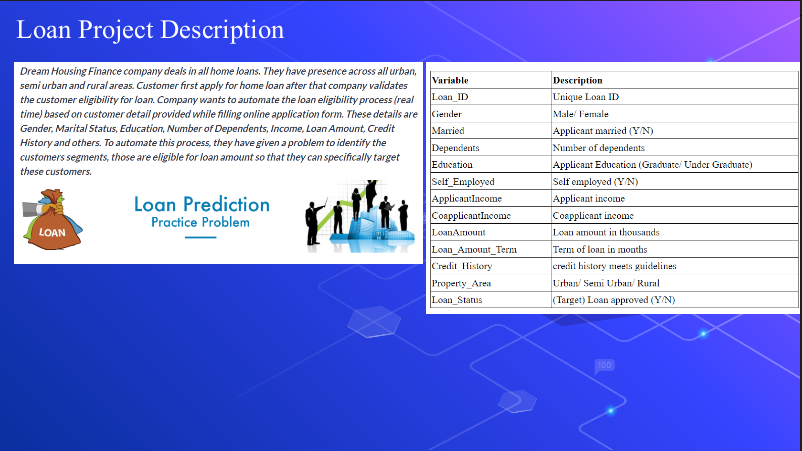

Variable|Description
------- | ---------
Loan_ID	| Unique Loan ID
Gender |Male/ Female
Married |	Applicant married (Y/N)
Dependents|	Number of dependents
Education	|Applicant Education (Graduate/ Under Graduate)
Self_Employed|	Self employed (Y/N)
ApplicantIncome|	Applicant income
CoapplicantIncome|	Coapplicant income
LoanAmount|	Loan amount in thousands
Loan_Amount_Term|	Term of loan in months
Credit_History|	credit history meets guidelines
Property_Area	|Urban/ Semi Urban/ Rural
Loan_Status|	Loan approved (Y/N)

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno      ## for missing values
from imblearn.over_sampling import SMOTE         ## oversampling for unbalanced clasess
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer

# data modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate
from lazypredict.Supervised import LazyClassifier    ## show all possible models
import joblib

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [3]:
loan=pd.read_csv('train_ctrUa4K.csv')
loan.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         NaN            360.00   
1             4583            1508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583            2358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban           Y  
1            1.00         Rural           N  
2            1.00         Urban           Y  
3            1.00         Urban           Y  
4            1.00         Urban           Y

In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

In [7]:
loan.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

In [7]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

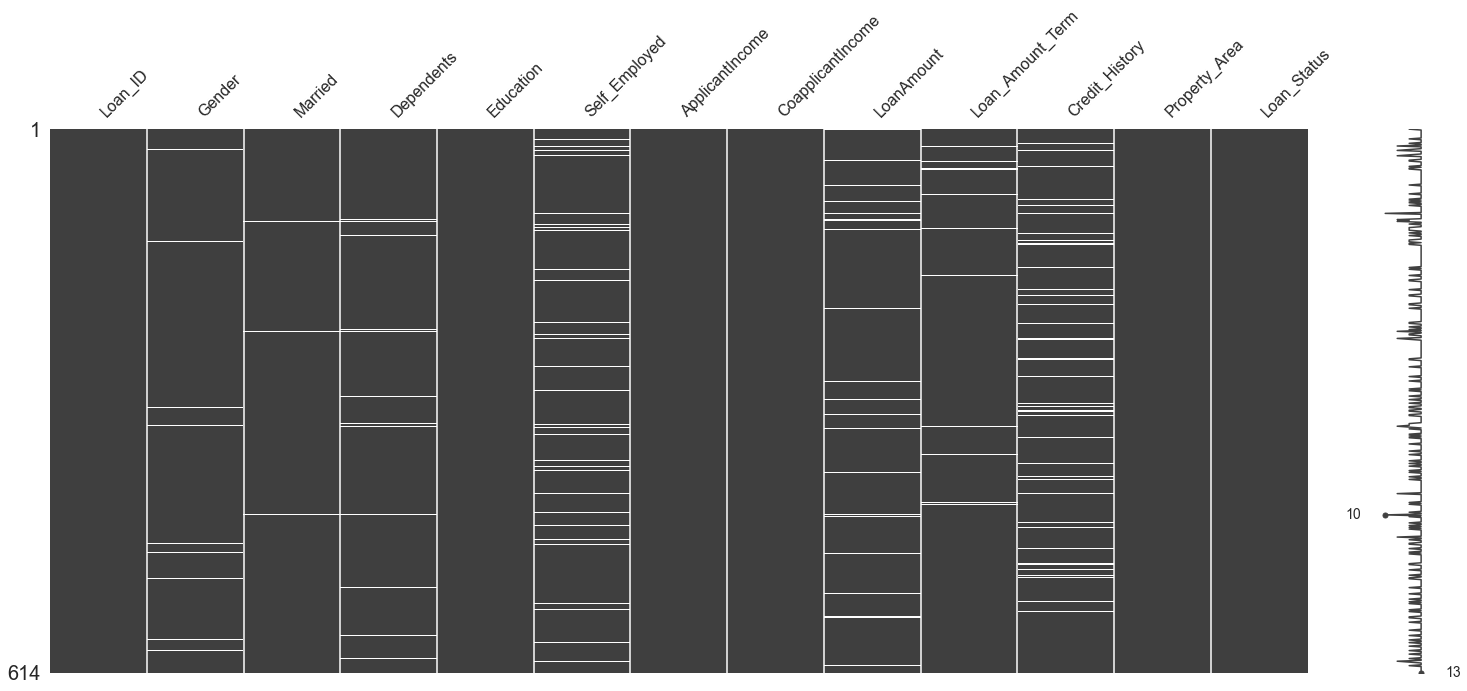

In [8]:
msno.matrix(loan)
plt.show()

In [9]:
loan.duplicated().sum()

0

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
There is no <b> Dublicated </b> values   
<br></p>

# <b><span style='color:#0000FF'></span> `Datasist First Analysis` </b>

In [10]:
import datasist
datasist.structdata.describe(loan)

First five data points


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         NaN            360.00   
1             4583            1508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583            2358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban           Y  
1            1.00         Rural           N  
2            1.00         Urban           Y  
3            1.00         Urban           Y  
4            1.00         Urban           Y



Random five data points


Loan_ID  Gender Married Dependents     Education Self_Employed  \
538  LP002739    Male     Yes          0  Not Graduate            No   
414  LP002335  Female     Yes          0  Not Graduate            No   
432  LP002386    Male      No          0      Graduate           NaN   
167  LP001578    Male     Yes          0      Graduate            No   
398  LP002284    Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
538             2917             536.00       66.00            360.00   
414             2149            3237.00      178.00            360.00   
432            12876               0.00      405.00            360.00   
167             2439            3333.00      129.00            360.00   
398             3902            1666.00      109.00            360.00   

     Credit_History Property_Area Loan_Status  
538            1.00         Rural           N  
414            0.00     Semiurban           N  
432            1.00     Semiurban           Y  
167            1.00         Rural           Y  
398            1.00         Rural           Y



Last five data points


Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900               0.00       71.00            360.00   
610             4106               0.00       40.00            180.00   
611             8072             240.00      253.00            360.00   
612             7583               0.00      187.00            360.00   
613             4583               0.00      133.00            360.00   

     Credit_History Property_Area Loan_Status  
609            1.00         Rural           Y  
610            1.00         Rural           Y  
611            1.00         Urban           Y  
612            1.00         Urban           Y  
613            0.00     Semiurban           N



Shape of  data set: (614, 13)


Size of  data set: 7982


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome   float64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object



Numerical Features in Data set
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Categorical Features in Data set


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']



Statistical Description of Columns


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count           614.00             614.00      592.00            600.00   
mean           5403.46            1621.25      146.41            342.00   
std            6109.04            2926.25       85.59             65.12   
min             150.00               0.00        9.00             12.00   
25%            2877.50               0.00      100.00            360.00   
50%            3812.50            1188.50      128.00            360.00   
75%            5795.00            2297.25      168.00            360.00   
max           81000.00           41667.00      700.00            480.00   

       Credit_History  
count          564.00  
mean             0.84  
std              0.36  
min              0.00  
25%              1.00  
50%              1.00  
75%              1.00  
max              1.00



Description of Categorical Features


count unique        top freq
Loan_ID         614    614   LP001002    1
Gender          601      2       Male  489
Married         611      2        Yes  398
Dependents      599      4          0  345
Education       614      2   Graduate  480
Self_Employed   582      2         No  500
Property_Area   614      3  Semiurban  233
Loan_Status     614      2          Y  422



Unique class Count of Categorical features




Missing Values in Data


features  missing_counts  missing_percent
0             Loan_ID               0             0.00
1              Gender              13             2.10
2             Married               3             0.50
3          Dependents              15             2.40
4           Education               0             0.00
5       Self_Employed              32             5.20
6     ApplicantIncome               0             0.00
7   CoapplicantIncome               0             0.00
8          LoanAmount              22             3.60
9    Loan_Amount_Term              14             2.30
10     Credit_History              50             8.10
11      Property_Area               0             0.00
12        Loan_Status               0             0.00

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [11]:
profile=ProfileReport(loan, minimal=True,explorative=True)
profile.to_file('loan analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile

# <b><span style='color:#0000FF'></span> `Play with data` </b>

### choose any graph or table, then drag and drop columns

In [13]:
from pivottablejs import pivot_ui
pivot_ui(loan)

# <b>5<span style='color:#0000FF'>|</span> Data Wrangling </b>

In [14]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
# count plot 
def CPlot(feature,hue) : 
    global loan
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=loan,hue=hue,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

# kde plot
def KPlot(feature) : 
    global loan
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(loan[feature],shade=True)
    return None


# pie plot 
def Pie(feature,limit=20) : 
    global loan
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(loan[feature].value_counts()[:limit],labels = list(loan[feature].value_counts()[:limit].index),
            autopct = '%1.1f%%',labeldistance= 1.1)
    return None                    

In [15]:
# box plot
def Box(feature,hue):
    global loan
    fig,ax = plt.subplots(figsize = (10,6))
    sns.boxplot(data=loan,x='Loan_Status', y=feature , hue=hue,palette='summer') 
    return None

def Bar(feature,hue):
    global loan
    fig,ax = plt.subplots(figsize = (10,6))
    sns.barplot(data=loan,x='Loan_Status', y=feature , hue= hue ,palette='Set2') 
    return None
    

In [16]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(20,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False,fmt='.1');plt.show() 

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Target Feature [Loan Status] </b></p>
</div>. 

## <b><span style='color:#0000FF'></span> `Loan Status (target)` </b>

In [18]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Among 614 Loan_Status
- Accepted : 422 
- Rejected : 192

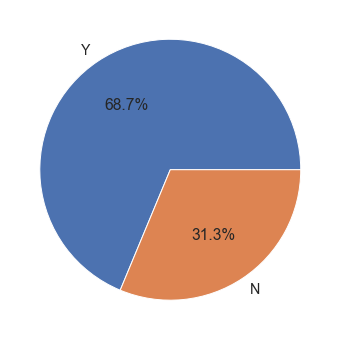

In [17]:
Pie('Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

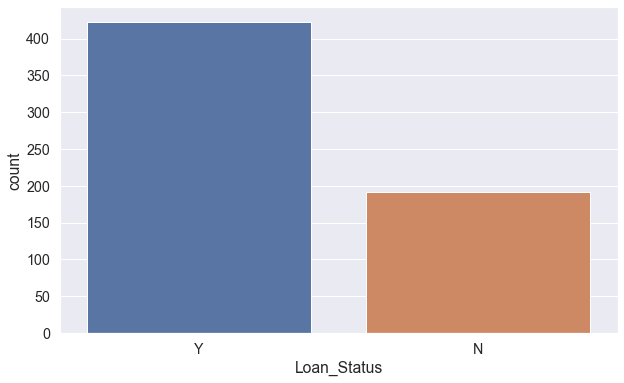

In [19]:
sns.countplot(data=loan,x='Loan_Status')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Independent variables [Categorical] </b></p>
</div>. 

 - Gender
 - Married 
 - Self employe
 - Credit history
 - Dependents
 - Education
 - Property_Area


## <b>5.2.1<span style='color:#0000FF'></span> `Gender` </b>

In [20]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### Among 601 person
- Male : 489 
- Female : 112



<AxesSubplot:xlabel='Gender', ylabel='count'>

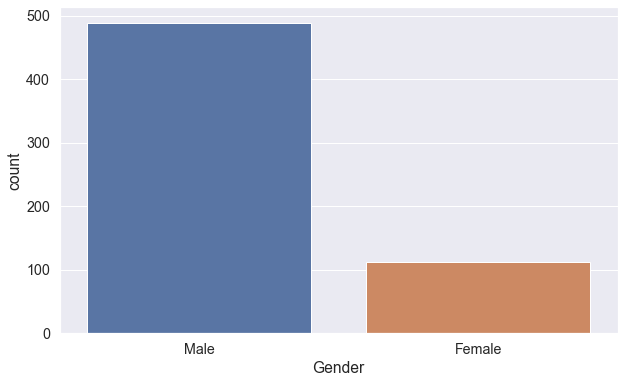

In [368]:
sns.countplot(data=loan,x='Gender')

<AxesSubplot:title={'center':'Gender'}>

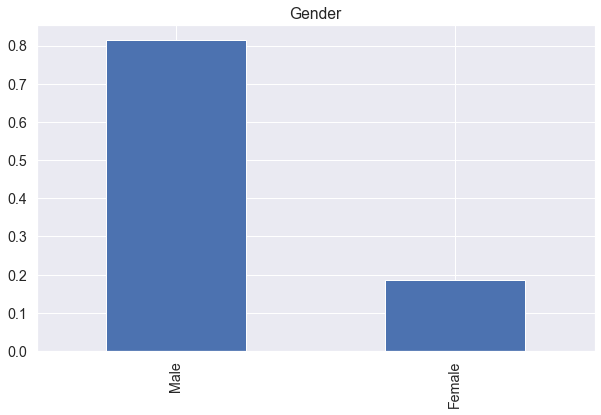

In [369]:
loan['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

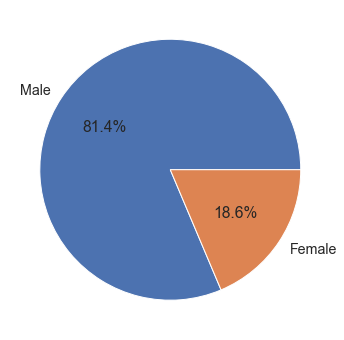

In [18]:
Pie('Gender')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
The gender feature contain  <b> Male : 81% </b> and <b> Female: 19% </b>    
<br></p>

In [370]:
loan.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

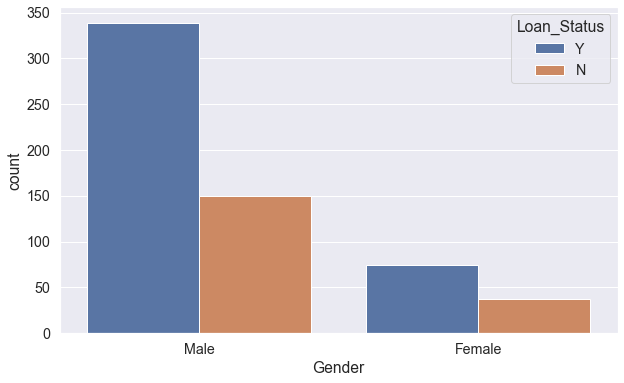

In [371]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan)

- Number of Female whose Loan was approved : 75

- Number of Male whose Loan was approved : 339

- Number of Female whose Loan was not approved : 37

- Number of Male whose Loan was not approved : 150


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b> Proportion of Male applicants is higher for the approved loans. </b>    
<br></p>

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

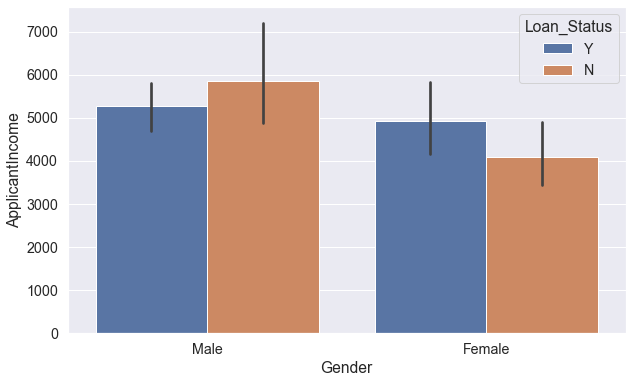

In [372]:
sns.barplot(x='Gender',hue='Loan_Status',y='ApplicantIncome',data=loan)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

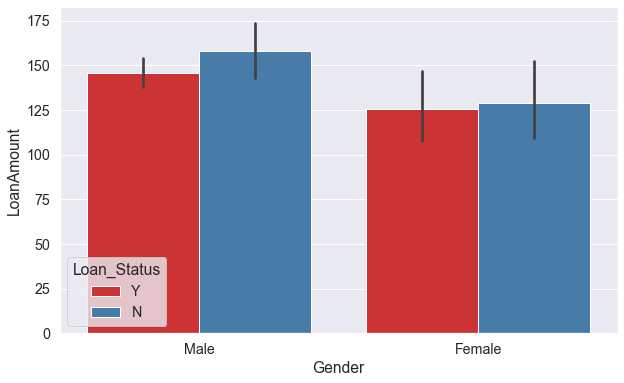

In [373]:
sns.barplot(x='Gender',hue='Loan_Status',y='LoanAmount',data=loan,palette='Set1')

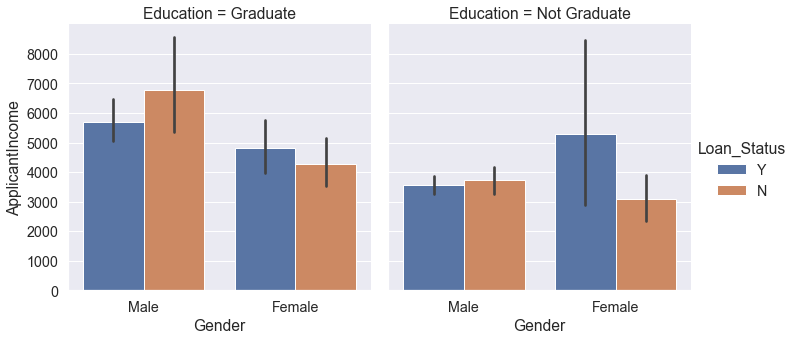

In [374]:
sns.catplot(x='Gender',hue='Loan_Status',y='ApplicantIncome',data=loan,kind='bar',col='Education')

## <b>5.2.2<span style='color:#0000FF'></span> `Married` </b>

In [375]:
loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### Total number of people : 611

- Married : 398

- Unmarried : 213


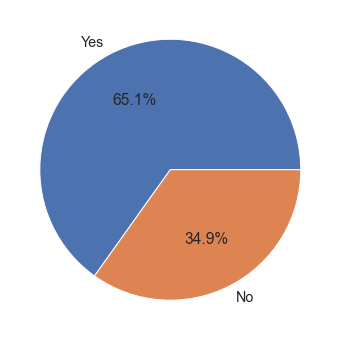

In [21]:
Pie('Married')

In [378]:
loan.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

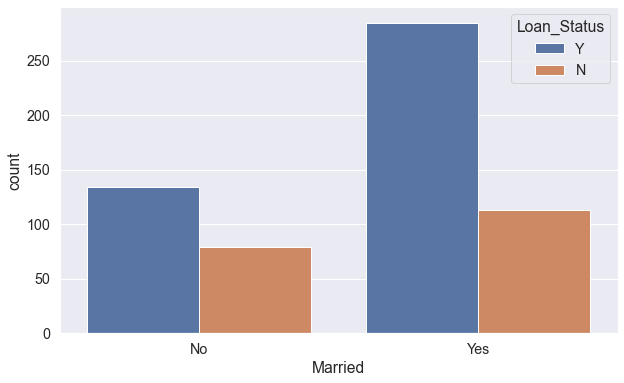

In [379]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

- Number of married people whose Loan was approved : 285

- Number of married people whose Loan was not approved : 113

- Number of unmarried people whose Loan was approved : 134

- Number of unmarried people whose Loan was not approved : 79


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>Proportion of Married applicants is higher for the approved loans.

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

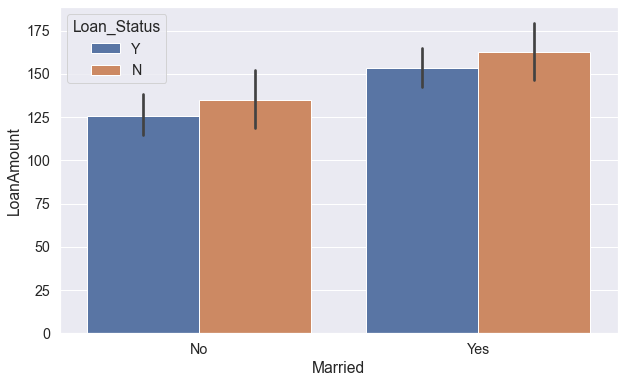

In [380]:
sns.barplot(x='Married',hue='Loan_Status',y='LoanAmount',data=loan)

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

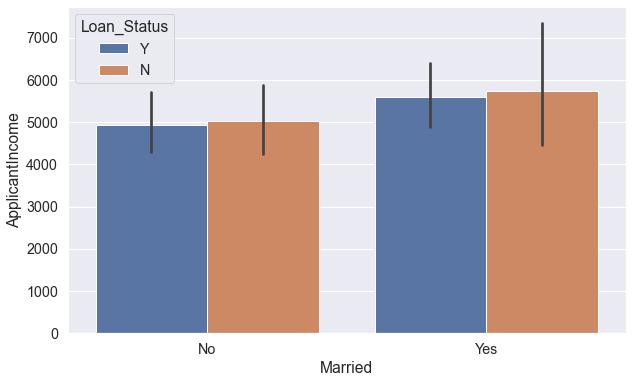

In [381]:
sns.barplot(x='Married',y='ApplicantIncome',hue='Loan_Status',data=loan)

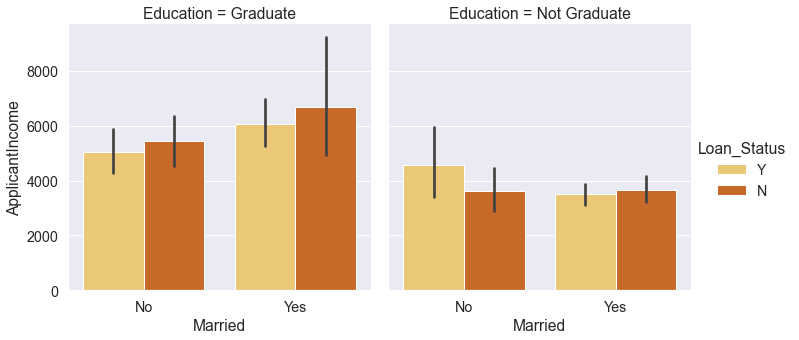

In [382]:
sns.catplot(data=loan,x='Married',y='ApplicantIncome',hue='Loan_Status',kind='bar',col='Education',palette='YlOrBr')

## <b>5.2.3<span style='color:#0000FF'></span> `Self_Employed` </b>

In [383]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### Total number of people : 582

- Self_Employed : 82

- Not_Self_Employed : 500

<AxesSubplot:title={'center':'Self Employed counts'}>

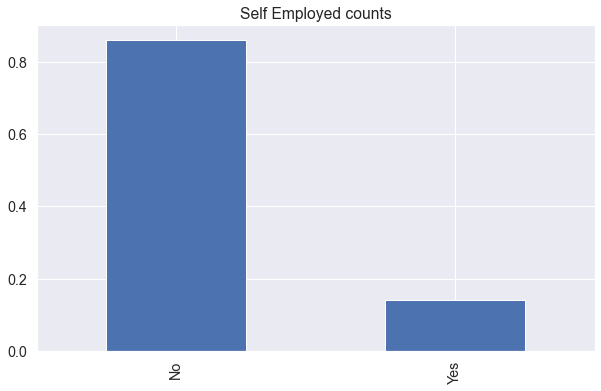

In [384]:
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed counts')

##### Among 582 people
- only 14% are Self_Employed 
- rest of the 86% are Not_Self_Employed



In [385]:
loan.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

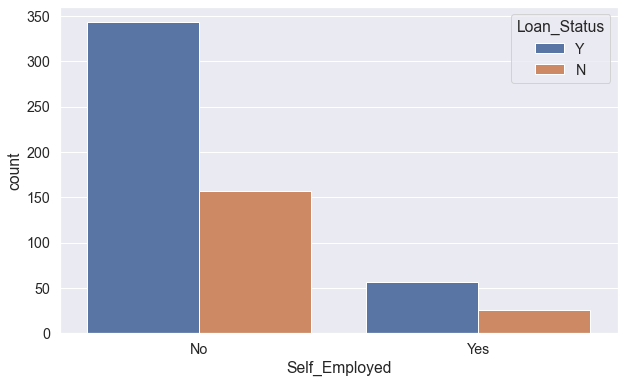

In [386]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan)

- People who are Self_Employed and Loan was approved : 56

- People who are Self_Employed and Loan was not approved : 26

- People who are not Self_Employed and Loan was approved : 343

- People who are not Self_Employed and Loan was not approved : 157



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

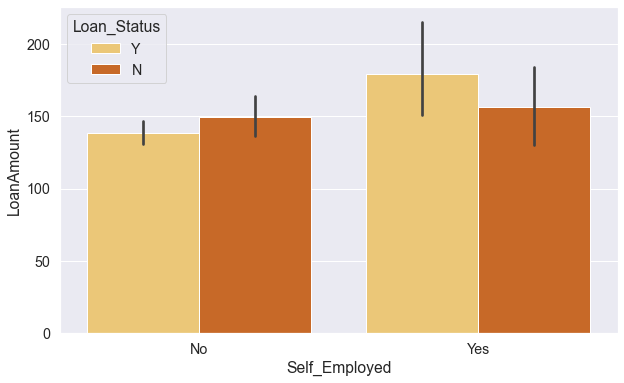

In [387]:
sns.barplot(x='Self_Employed',hue='Loan_Status',y='LoanAmount',data=loan,palette='YlOrBr')

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

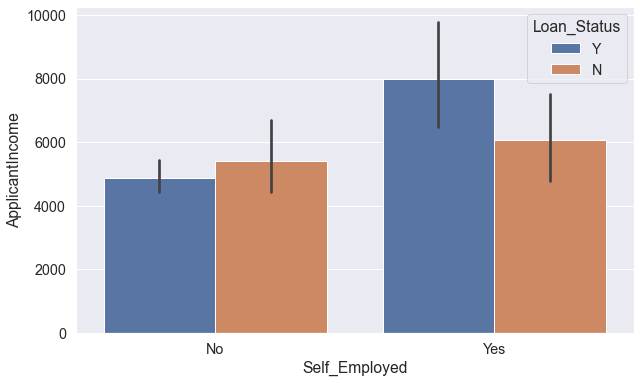

In [388]:
sns.barplot(x='Self_Employed',hue='Loan_Status',y='ApplicantIncome',data=loan)

## <b>5.2.4<span style='color:#0000FF'></span> `Credit_History` </b>

In [389]:
loan.Credit_History.value_counts()

1.00    475
0.00     89
Name: Credit_History, dtype: int64

#### Total number of debts : 564

- Repaid Debts : 475

- Not Repaid Debts : 89

<AxesSubplot:title={'center':'Credit History'}>

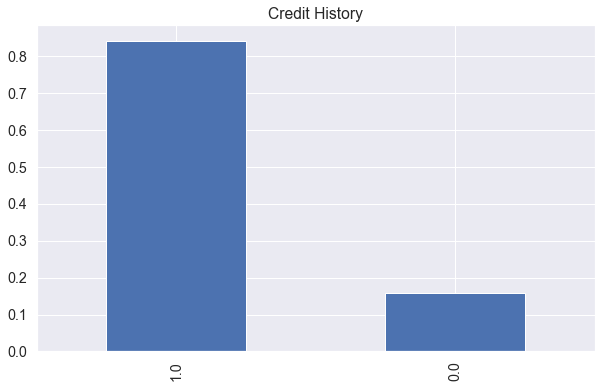

In [390]:
loan.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')

-  **Around 84% applicants have repaid their debts.**



In [391]:
loan.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.00            N               82
                Y                7
1.00            Y              378
                N               97
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

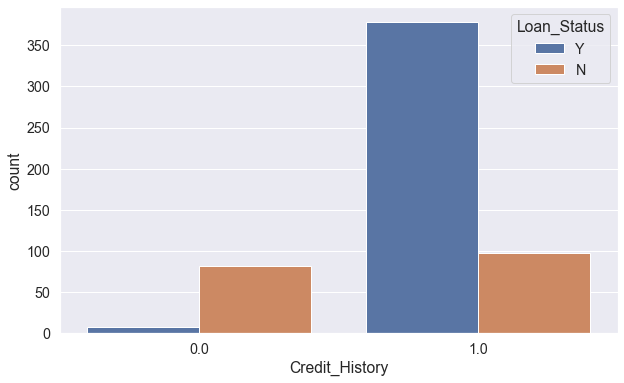

In [392]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan)

- People with credit history as 1 and loan was approved : 378

- People with credit history as 1 and loan was not approved : 97

- People with credit history as 0 and loan was approved : 7

- People with credit history as 0 and loan was not approved : 82



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>It seems people with credit history as [1] are more likely to get their loans approved.

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

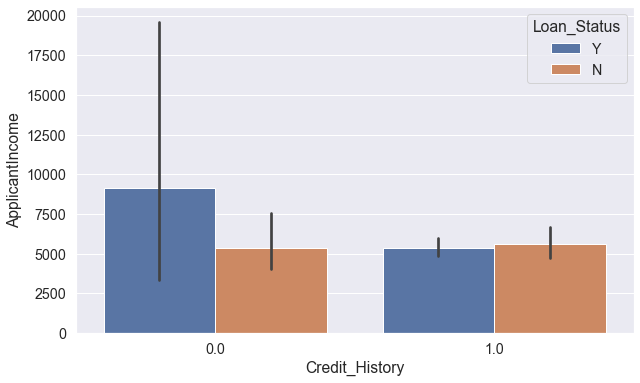

In [393]:
sns.barplot(x='Credit_History',hue='Loan_Status',y='ApplicantIncome',data=loan)

## <b>5.2.5<span style='color:#0000FF'></span> `Dependents` </b>

In [394]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

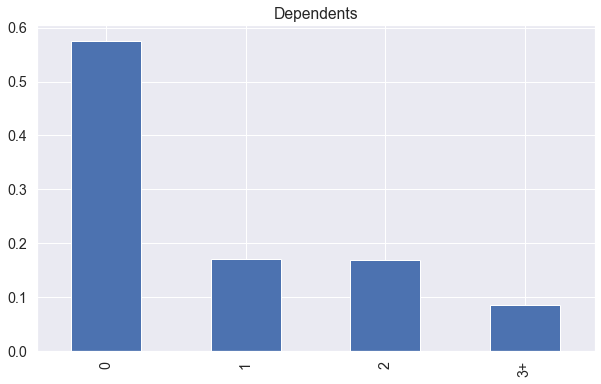

In [395]:
loan.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')

- 58% people have 0 dependent

- 17% people have 1 dependent

- 17% people have 2 dependent

- 8% people have 3+ dependent

In [396]:
loan.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

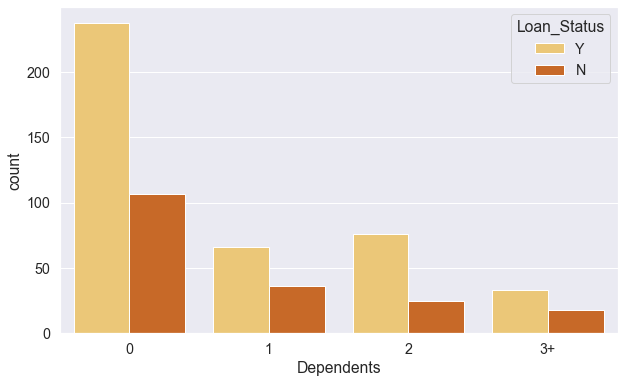

In [397]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan,palette='YlOrBr')

- Number of dependents on the loan applicant : 0 and Loan was approved : 238

- Number of dependents on the loan applicant : 0 and Loan was not approved : 107

- Number of dependents on the loan applicant : 1 and Loan was approved : 66

- Number of dependents on the loan applicant : 1 and Loan was not approved : 36

- Number of dependents on the loan applicant : 2 and Loan was approved : 76

- Number of dependents on the loan applicant : 2 and Loan was not approved : 25

- Number of dependents on the loan applicant : 3+ and Loan was approved : 33

- Number of dependents on the loan applicant : 3+ and Loan was not approved : 18



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

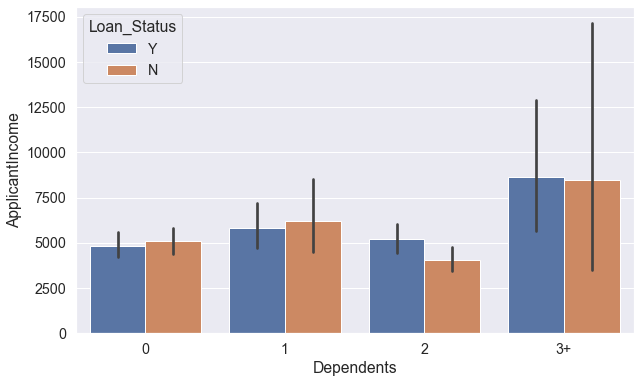

In [398]:
sns.barplot(x='Dependents',hue='Loan_Status',y='ApplicantIncome',data=loan)

## <b>5.2.6<span style='color:#0000FF'></span> `Education` </b>

In [399]:
loan.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

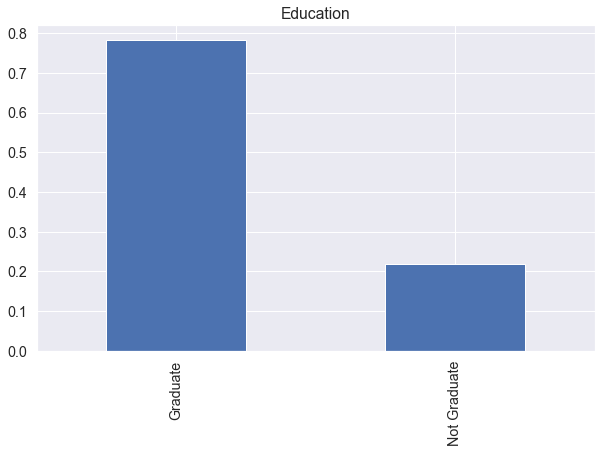

In [400]:
loan.Education.value_counts(normalize=True).plot.bar(title='Education')

- Total number of People : 614

- 78% are Graduated and 22% are not Graduated

In [401]:
loan.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

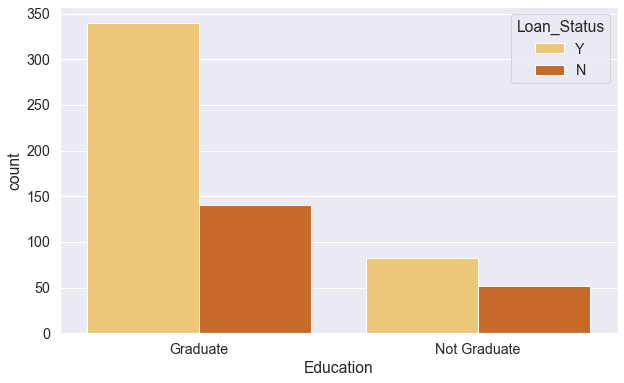

In [402]:
sns.countplot(x='Education',hue='Loan_Status',data=loan,palette='YlOrBr')

- Number of people who are Graduate and Loan was approved : 340

- Number of people who are Graduate and Loan was no approved : 140

- Number of people who are Not Graduate and Loan was approved : 82

- Number of people who are Not Graduate and Loan was not approved : 52



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>Proportion of Graduate applicants is higher for the approved loans.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

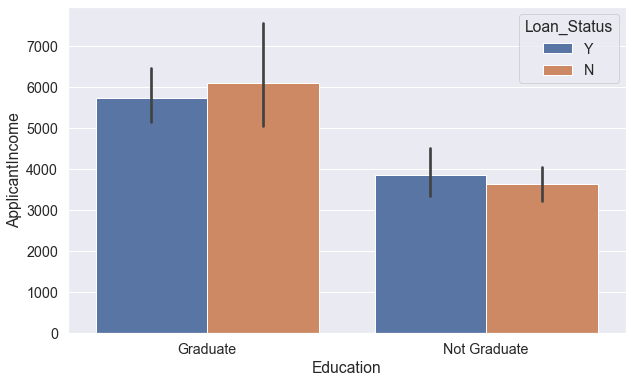

In [403]:
sns.barplot(x='Education',hue='Loan_Status',y='ApplicantIncome',data=loan)

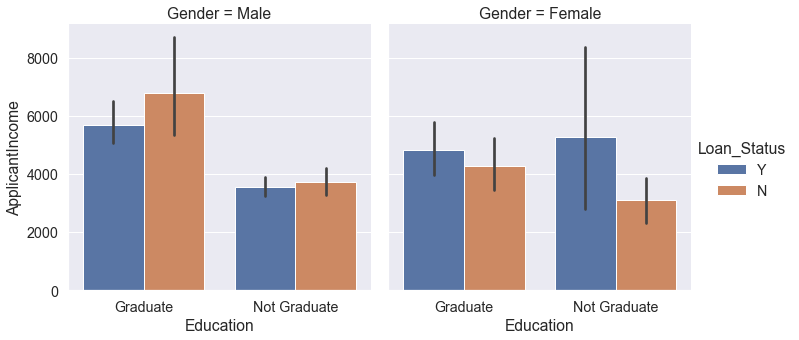

In [404]:
sns.catplot(x='Education',hue='Loan_Status',y='ApplicantIncome',data=loan,kind='bar',col='Gender')

## <b>5.2.7<span style='color:#0000FF'></span> `Property_Area` </b>

In [405]:
loan.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_Area'}>

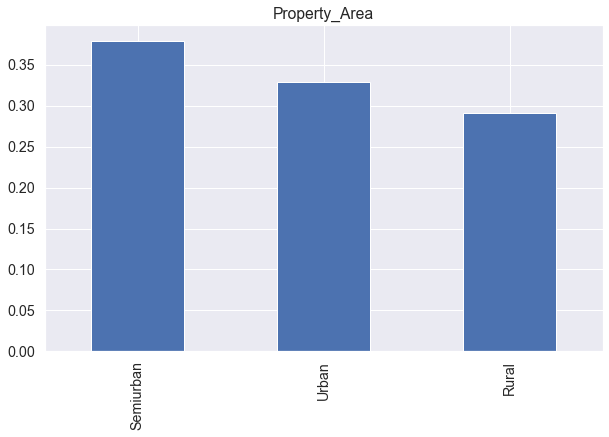

In [406]:
loan.Property_Area.value_counts(normalize=True).plot.bar(title='Property_Area')

- 38% people from Semiurban area

- 33% people from Urban area

- 29% people from Rural area

In [407]:
loan.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

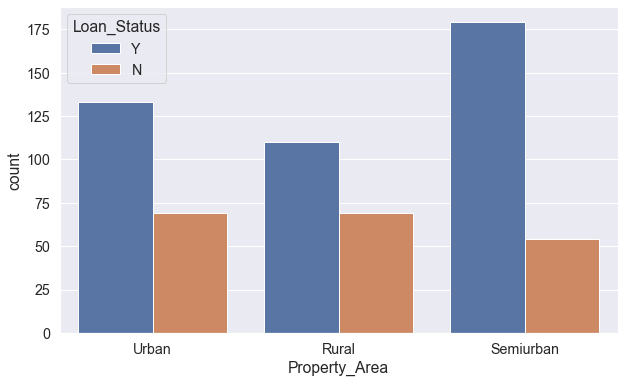

In [408]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan)

- People who are from Rural area and loan was approved : 110

- People who are from Rural area and loan was not approved : 69

- People who are from Semiurban area and loan was approved : 179

- People who are from Semiurban area and loan was not approved : 54

- People who are from Urban area and loan was approved : 133

- People who are from Semiurban area and loan was not approved : 69



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
 <b>Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.3 | Independent variables [Numerical] </b></p>
</div>. 

- Applicant_Income
- Coapplicant_Income
- Loan_Amount
- Loan_Amount_Term

## <b>5.3.1<span style='color:#0000FF'></span> `Applicant Income` </b>

In [417]:
loan[['ApplicantIncome']].describe().T

count    mean     std    min     25%     50%     75%      max
ApplicantIncome 614.00 5403.46 6109.04 150.00 2877.50 3812.50 5795.00 81000.00

<AxesSubplot:xlabel='ApplicantIncome'>

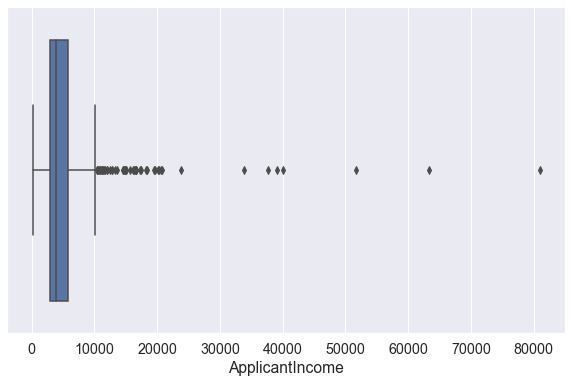

In [418]:
sns.boxplot(data=loan,x='ApplicantIncome')


**The boxplot confirms the presence of a lot of outliers/extreme values**

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

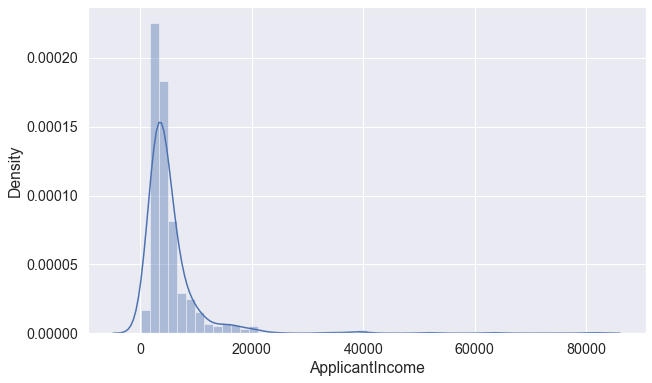

In [419]:
sns.distplot(loan.ApplicantIncome)

**the data in the distribution of applicant income is towards left which means it is not normally distributed**

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Gender'>

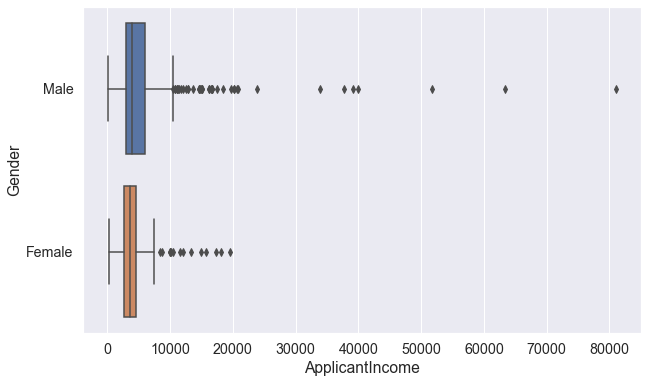

In [420]:
sns.boxplot(data=loan,x='ApplicantIncome',y='Gender')

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

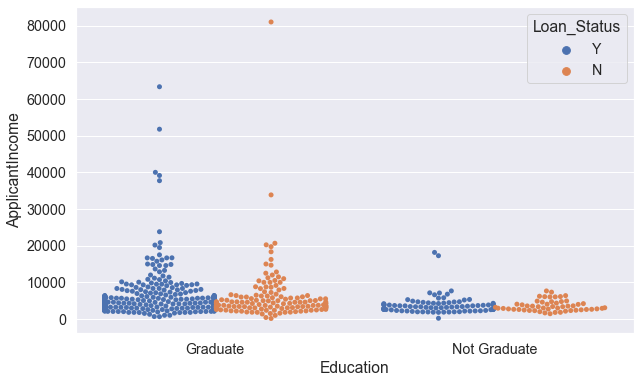

In [421]:
sns.swarmplot(y='ApplicantIncome',x='Education',hue='Loan_Status',data=loan,dodge=True)

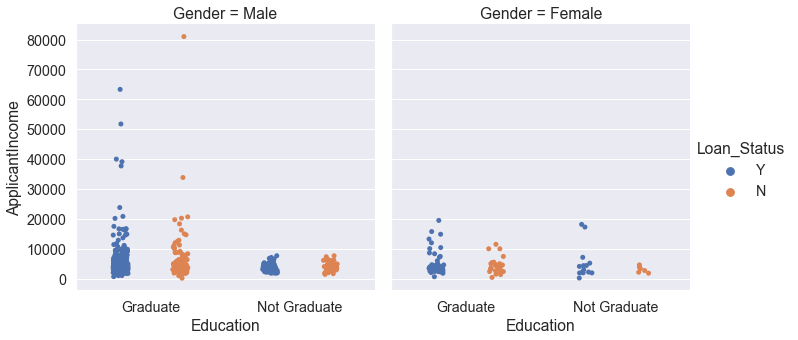

In [422]:
sns.catplot(y='ApplicantIncome',x='Education',hue='Loan_Status',col='Gender',data=loan,dodge=True)

## <b>5.3.2<span style='color:#0000FF'></span> `Coapplicant_Income` </b>

In [423]:
loan[['CoapplicantIncome']].describe().T

count    mean     std  min  25%     50%     75%      max
CoapplicantIncome 614.00 1621.25 2926.25 0.00 0.00 1188.50 2297.25 41667.00

<AxesSubplot:xlabel='CoapplicantIncome'>

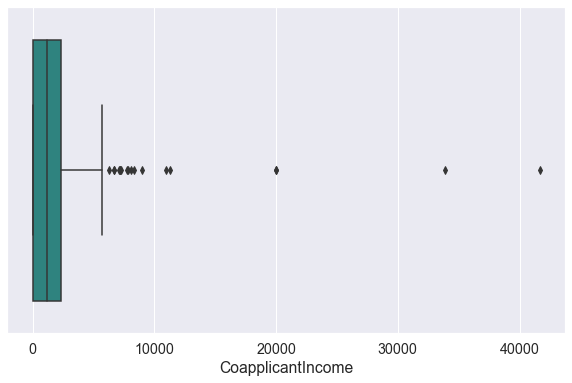

In [424]:
sns.boxplot(data=loan,x='CoapplicantIncome',palette='viridis')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

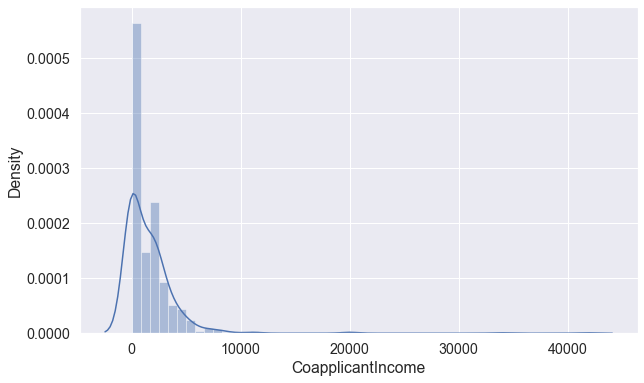

In [425]:
sns.distplot(loan.CoapplicantIncome)

**distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.**

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

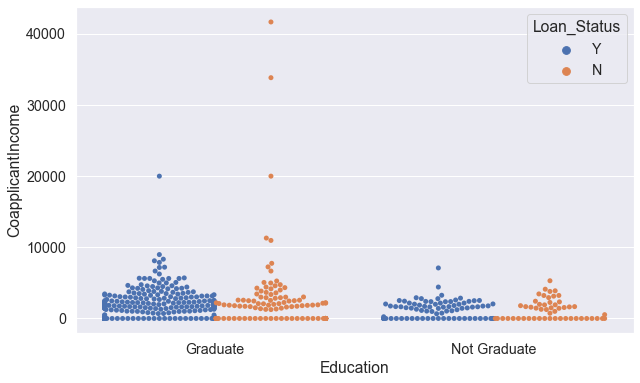

In [426]:
sns.swarmplot(y='CoapplicantIncome',x='Education',hue='Loan_Status',data=loan,dodge=True)

## <b>5.3.3<span style='color:#0000FF'></span> `Loan Amount` </b>

In [427]:
loan[['LoanAmount']].describe().T

count   mean   std  min    25%    50%    75%    max
LoanAmount 614.00 146.41 84.04 9.00 100.25 129.00 164.75 700.00

<AxesSubplot:>

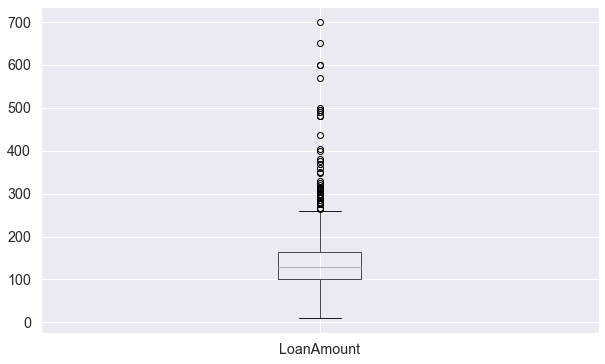

In [428]:
loan[['LoanAmount']].boxplot()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

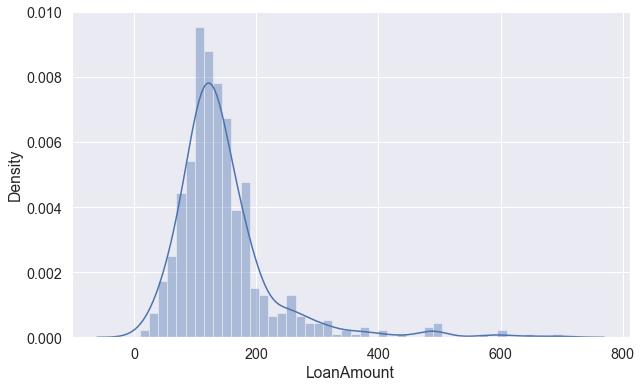

In [429]:
sns.distplot(loan.LoanAmount)

**a lot of outliers in this variable and the distribution is fairly normal.**

## <b>5.3.4<span style='color:#0000FF'></span> `Loan_Amount_Term` </b>

In [430]:
loan[['Loan_Amount_Term']].describe().T

count   mean   std   min    25%    50%    75%    max
Loan_Amount_Term 614.00 342.41 64.43 12.00 360.00 360.00 360.00 480.00

<AxesSubplot:xlabel='Loan_Amount_Term'>

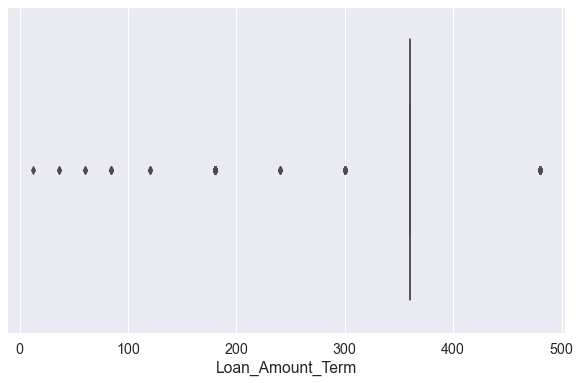

In [431]:
sns.boxplot(data=loan,x='Loan_Amount_Term')

**a lot of outliers in this variable and the distribution is fairly normal**

In [409]:
corr=loan.corr()
corr

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome               1.00              -0.12        0.57   
CoapplicantIncome            -0.12               1.00        0.19   
LoanAmount                    0.57               0.19        1.00   
Loan_Amount_Term             -0.05              -0.06        0.04   
Credit_History               -0.01              -0.00       -0.01   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome               -0.05           -0.01  
CoapplicantIncome             -0.06           -0.00  
LoanAmount                     0.04           -0.01  
Loan_Amount_Term               1.00            0.00  
Credit_History                 0.00            1.00

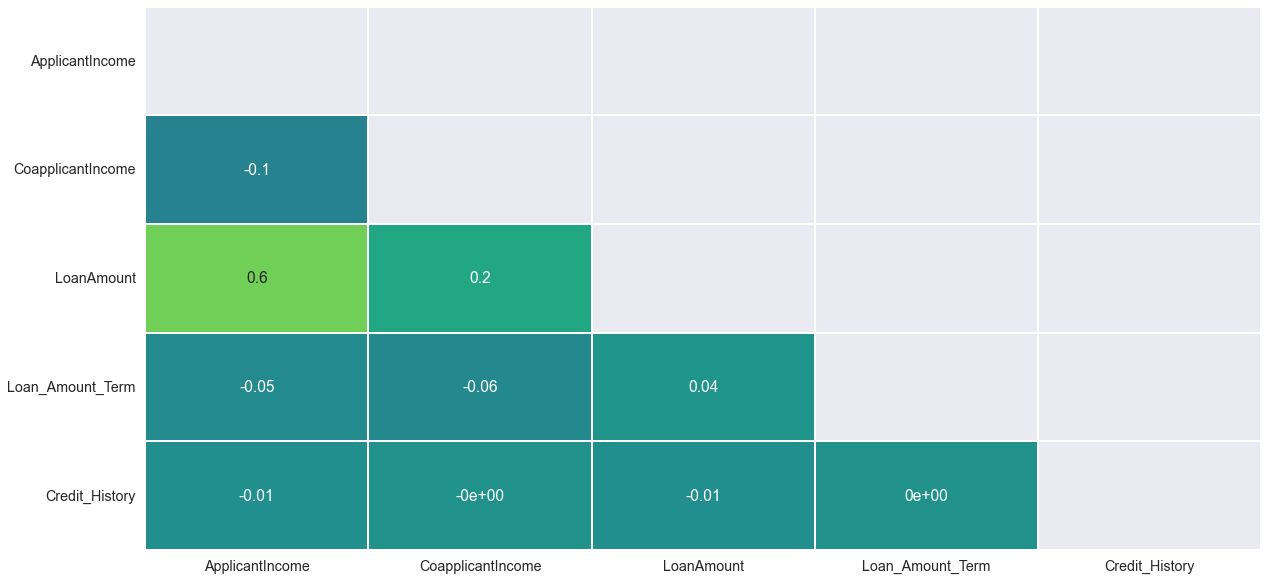

In [410]:
corrMat(loan)

# <b>6<span style='color:#0000FF'>|</span> Data Preprocessing</b>

In [380]:
loan=pd.read_csv('train_ctrUa4K.csv')
loan.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         NaN            360.00   
1             4583            1508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583            2358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban           Y  
1            1.00         Rural           N  
2            1.00         Urban           Y  
3            1.00         Urban           Y  
4            1.00         Urban           Y

## <b>6.1<span style='color:#0000FF'></span> `Dropping unnecessary columns` </b>

In [381]:
## drop loan ID column 
loan.drop(columns=['Loan_ID'],inplace=True,axis=1)

## <b>6.2<span style='color:#0000FF'></span> `Data Imputation` </b>

In [382]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**1. Categorical Features**
- the imputation for categorical variables will be performed using mode

In [383]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)

**2. Numerical Variables**
- imputation for numerical variables using mean.

In [384]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

### Encode target

In [385]:
loan['Loan_Status']=loan['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

#### Create new data csv with converted columns

In [386]:
loan.to_csv('pre_loan.csv',index=False)

# <b>7 <span style='color:#0000FF'>|</span> Modeling ` Using Pipeline` </b>

In [387]:
loan=pd.read_csv('pre_loan.csv')
loan.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               0.00      146.41            360.00            1.00   
1            1508.00      128.00            360.00            1.00   
2               0.00       66.00            360.00            1.00   
3            2358.00      120.00            360.00            1.00   
4               0.00      141.00            360.00            1.00   

  Property_Area  Loan_Status  
0         Urban            1  
1         Rural            0  
2         Urban            1  
3         Urban            1  
4         Urban            1

In [388]:
features = loan.drop(columns =['Loan_Status'], axis = 1)
target = loan['Loan_Status']

In [389]:
Encoder = ColumnTransformer(transformers=[("OHE" , OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) , ['Gender' , 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area'])],remainder="passthrough" )

## <b>1. <span style='color:#0000FF'></span> `Remove Outliers & Infinite values` </b>

In [191]:
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3 - Q1

loan = loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]

In [192]:
loan.Loan_Status.value_counts()

1    322
0     74
Name: Loan_Status, dtype: int64

**it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting**

In [116]:
#Imputer=ColumnTransformer([('categorical', SimpleImputer(strategy='most_frequent'),['Gender' , 'Married', 'Dependents','Credit_History', 'Self_Employed', 'Loan_Amount_Term']),('numerical',SimpleImputer(),['LoanAmount'])],remainder="passthrough")

In [193]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , StandardScaler()))
steps.append(("smote" , SMOTE()))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps = steps)

In [194]:
pipeline

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', StandardScaler()), ('smote', SMOTE()),
                ('Model', LogisticRegression())])

In [195]:
scores = cross_validate(pipeline , features , target , cv = 5 , scoring=('accuracy', 'recall', 'precision') , return_train_score=True)

In [196]:
scores

{'fit_time': array([0.02701735, 0.02302051, 0.01901269, 0.02702212, 0.03002   ]),
 'score_time': array([0.01201034, 0.00950432, 0.01000547, 0.01250911, 0.01200747]),
 'test_accuracy': array([0.79674797, 0.69918699, 0.72357724, 0.73170732, 0.67213115]),
 'train_accuracy': array([0.77596741, 0.79022403, 0.76985743, 0.75560081, 0.74390244]),
 'test_recall': array([0.89411765, 0.82352941, 0.82142857, 0.77380952, 0.70238095]),
 'train_recall': array([0.86646884, 0.86646884, 0.85798817, 0.82544379, 0.78698225]),
 'test_precision': array([0.82608696, 0.76086957, 0.78409091, 0.82278481, 0.7972973 ]),
 'train_precision': array([0.81792717, 0.83428571, 0.81690141, 0.82058824, 0.83125   ])}

In [197]:
scores["train_accuracy"].mean()

0.7671104267050817

In [198]:
scores['test_accuracy'].mean()

0.7246701319472211

In [199]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("DT" , DecisionTreeClassifier()))
models.append(("svc" , SVC()))
models.append(("naive_bayes" , GaussianNB()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))

In [390]:
for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , StandardScaler()))
    steps.append(("smote" , SMOTE()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , features , target , scoring=('accuracy', 'recall', 'precision')  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_accuracy"].mean() )
    print("-" * 50)
    print("Test_accuracy" , scores["test_accuracy"].mean())
    print("-" * 50)
    print('Precision Score: ', scores["test_precision"].mean())
    print('-'*50)
    print('Recall Score: ', scores["test_recall"].mean())
    print("\n")

LR
Train_accuracy 0.7780868643716986
--------------------------------------------------
Test_accuracy 0.7637744902039184
--------------------------------------------------
Precision Score:  0.7993364663682526
--------------------------------------------------
Recall Score:  0.8789635854341735


KNN
Train_accuracy 0.8249143112612389
--------------------------------------------------
Test_accuracy 0.6872984139677463
--------------------------------------------------
Precision Score:  0.7874168175666303
--------------------------------------------------
Recall Score:  0.748655462184874


DT
Train_accuracy 1.0
--------------------------------------------------
Test_accuracy 0.6921498067439692
--------------------------------------------------
Precision Score:  0.7899164461908474
--------------------------------------------------
Recall Score:  0.7535294117647059


svc
Train_accuracy 0.8407969466660044
--------------------------------------------------
Test_accuracy 0.7572837531654004
-----

## <b>2. <span style='color:#0000FF'></span> `Without Remove Outliers` </b>

In [391]:
loan=pd.read_csv('pre_loan.csv')
loan.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               0.00      146.41            360.00            1.00   
1            1508.00      128.00            360.00            1.00   
2               0.00       66.00            360.00            1.00   
3            2358.00      120.00            360.00            1.00   
4               0.00      141.00            360.00            1.00   

  Property_Area  Loan_Status  
0         Urban            1  
1         Rural            0  
2         Urban            1  
3         Urban            1  
4         Urban            1

In [392]:
for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , StandardScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , features , target , scoring=('accuracy', 'recall', 'precision')  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_accuracy"].mean() )
    print("-" * 50)
    print("Test_accuracy" , scores["test_accuracy"].mean())
    print("-" * 50)
    print('Precision Score: ', scores["test_precision"].mean())
    print('-'*50)
    print('Recall Score: ', scores["test_recall"].mean())
    print("\n")

LR
Train_accuracy 0.8118921067011078
--------------------------------------------------
Test_accuracy 0.8045715047314408
--------------------------------------------------
Precision Score:  0.7899124887399417
--------------------------------------------------
Recall Score:  0.9763025210084034


KNN
Train_accuracy 0.8277714304637955
--------------------------------------------------
Test_accuracy 0.7785019325603092
--------------------------------------------------
Precision Score:  0.7894950800833153
--------------------------------------------------
Recall Score:  0.9264425770308122


DT
Train_accuracy 1.0
--------------------------------------------------
Test_accuracy 0.7084899373583899
--------------------------------------------------
Precision Score:  0.798670852860179
--------------------------------------------------
Recall Score:  0.7749019607843136


svc
Train_accuracy 0.8253249548788768
--------------------------------------------------
Test_accuracy 0.8029454884712781
-----

## <b><span style='color:#0000FF'></span> `Apply the best model` </b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Support Vector Machine  </b></p>
</div>. 

In [346]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = 0.2, random_state = 44)

In [347]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (491, 11)
Shape of testing feature: (123, 11)
Shape of training label: (491,)
Shape of training label: (123,)


Training Accuracy: 0.8228105906313645
__________________________________________________
Accuracy Score:  0.8373983739837398
__________________________________________________
Precision Score:  0.8380952380952381
__________________________________________________
Recall Score:  0.967032967032967
__________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        32
           1       0.84      0.97      0.90        91

    accuracy                           0.84       123
   macro avg       0.84      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

__________________________________________________
F1 Score:  0.8979591836734694


Text(26.5, 0.5, 'True')

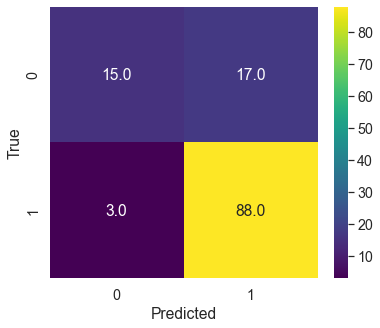

In [393]:
model=Pipeline(steps=[('Encoder',Encoder),('Scaler', StandardScaler()),('Model', SVC())])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# Calculate accuracy, precision, recall
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print('_'*50)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('_'*50)
print('Precision Score: ', precision_score(y_test, y_pred))
print('_'*50)
print('Recall Score: ', recall_score(y_test, y_pred))
print('_'*50)
print(classification_report(y_test,y_pred))
print('_'*50)
print('F1 Score: ',f1_score(y_test,y_pred))
    
# Display confussion matrix
plt.figure(figsize = (6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,cmap='viridis', fmt = '.1f')   # plot_kwargs = {'percent' : True}
plt.xlabel('Predicted')
plt.ylabel('True')


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Support vector | Cross_Validation   </b></p>
</div>. 

In [394]:
scores = cross_validate(model , features , target , cv = 5 , scoring=('accuracy', 'recall', 'precision') , return_train_score=True)

In [395]:
scores

{'fit_time': array([0.03902411, 0.02801943, 0.03702402, 0.04202652, 0.02651763]),
 'score_time': array([0.02767324, 0.01552057, 0.02852345, 0.01601076, 0.01451325]),
 'test_accuracy': array([0.81300813, 0.7804878 , 0.7804878 , 0.82926829, 0.81147541]),
 'train_accuracy': array([0.82077393, 0.83503055, 0.82892057, 0.81466395, 0.82723577]),
 'test_recall': array([0.98823529, 0.97647059, 0.97619048, 0.96428571, 0.97619048]),
 'train_recall': array([0.9851632 , 0.98813056, 0.99112426, 0.98816568, 0.98816568]),
 'test_precision': array([0.79245283, 0.76851852, 0.76635514, 0.81818182, 0.7961165 ]),
 'train_precision': array([0.8       , 0.81219512, 0.80528846, 0.79334917, 0.80481928])}

In [396]:
print("Train_accuracy" , scores["train_accuracy"].mean() )
print("_" * 50)
print("Test_accuracy" , scores["test_accuracy"].mean())
print("_" * 50)
print('Precision Score: ', scores["test_precision"].mean())
print('_'*50)
print('Recall Score: ', scores["test_recall"].mean())

Train_accuracy 0.8253249548788768
__________________________________________________
Test_accuracy 0.8029454884712781
__________________________________________________
Precision Score:  0.7883249623860602
__________________________________________________
Recall Score:  0.9762745098039216


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Support Vector Classifier | Grid_search   </b></p>
</div>. 

In [241]:
from sklearn.model_selection import GridSearchCV

In [336]:
params={'Model__C': [0.1, 1, 10, 100, 1000], 
              'Model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'Model__kernel': ['rbf']}

In [397]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5,return_train_score=True, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
     

In [398]:
grid_search.best_params_

{'Model__C': 100, 'Model__gamma': 0.001, 'Model__kernel': 'rbf'}

In [399]:
grid_search.cv_results_["mean_train_score"].mean()

0.8142348237004725

In [400]:
grid_search.cv_results_["mean_test_score"].mean()

0.7413300350443208

In [401]:
grid_predictions = grid_search.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        32
           1       0.84      0.98      0.90        91

    accuracy                           0.85       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.85      0.85      0.83       123



In [408]:
final_model=grid_search.best_estimator_

## <b><span style='color:#0000FF'></span> `Final model` </b>

Training Accuracy: 0.8228105906313645
__________________________________________________
Accuracy Score:  0.8373983739837398
__________________________________________________
Precision Score:  0.8380952380952381
__________________________________________________
Recall Score:  0.967032967032967
__________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        32
           1       0.84      0.97      0.90        91

    accuracy                           0.84       123
   macro avg       0.84      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

__________________________________________________
F1 Score:  0.8979591836734694


Text(26.5, 0.5, 'True')

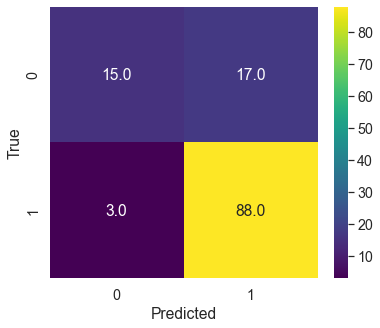

In [374]:
final_model=Pipeline(steps=[('Encoder',Encoder),('Scaler', StandardScaler()),('Model', SVC(C=10, gamma= 0.01, kernel= 'rbf'))])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# Calculate accuracy, precision, recall
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print('_'*50)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('_'*50)
print('Precision Score: ', precision_score(y_test, y_pred))
print('_'*50)
print('Recall Score: ', recall_score(y_test, y_pred))
print('_'*50)
print(classification_report(y_test,y_pred))
print('_'*50)
print('F1 Score: ',f1_score(y_test,y_pred))
    
# Display confussion matrix
plt.figure(figsize = (6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,cmap='viridis', fmt = '.1f')   # plot_kwargs = {'percent' : True}
plt.xlabel('Predicted')
plt.ylabel('True')


In [375]:
Inputs=features.columns
Inputs

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# <b>8 <span style='color:#0000FF'>|</span> Deployment </b>

In [409]:
# save the model
joblib.dump(final_model, 'model.h5') 

['model.h5']

In [410]:
# save the inputs
joblib.dump(Inputs, 'inputs.h5') 

['inputs.h5']

# <b>9 <span style='color:#0000FF'>|</span> Testing Model </b>

In [432]:
Inputs

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [436]:
data = {key : None for key in Inputs}

for key in data.keys() :
    print(key)
    value = input(f'enter the {key}')
    data[key] = value

Gender
enter the GenderMale
Married
enter the MarriedYes
Dependents
enter the Dependents2
Education
enter the EducationGraduate
Self_Employed
enter the Self_EmployedYes
ApplicantIncome
enter the ApplicantIncome300
CoapplicantIncome
enter the CoapplicantIncome200
LoanAmount
enter the LoanAmount250
Loan_Amount_Term
enter the Loan_Amount_Term360
Credit_History
enter the Credit_History1
Property_Area
enter the Property_AreaUrban


In [437]:
data

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'Yes',
 'ApplicantIncome': '300',
 'CoapplicantIncome': '200',
 'LoanAmount': '250',
 'Loan_Amount_Term': '360',
 'Credit_History': '1',
 'Property_Area': 'Urban'}

In [438]:
test_df = pd.DataFrame(data,index=[0])
test_df

Gender Married Dependents Education Self_Employed ApplicantIncome  \
0   Male     Yes          2  Graduate           Yes             300   

  CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area  
0               200        250              360              1         Urban

In [439]:
result = final_model.predict(test_df)[0]

In [440]:
result

1

# <b>10 <span style='color:#0000FF'>|</span> Application </b>

In [8]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("inputs.h5")
Model = joblib.load("model.h5")

def predict(Gender,Married,Dependents, Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,
        Loan_Amount_Term,Credit_History,Property_Area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = ApplicantIncome
    test_df.at[0,"CoapplicantIncome"] = CoapplicantIncome
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    result = Model.predict(test_df)[0]
    return result
    

def header(url):
     st.markdown(f'<p style="background-color:#0066cc;color:#33ff33;font-size:24px;border-radius:2%;">{url}</p>', unsafe_allow_html=True)    

# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Status ML classification App</h1> 
    </div> 
    """
     
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)
    # following lines create boxes in which user can enter data required to make prediction
    st.sidebar.title("Choose your Features") 
    ApplicantIncome = st.sidebar.slider("Total Applicant Income", min_value=0, max_value=100000, value=0, step=1)
    CoapplicantIncome = st.sidebar.slider("Total Co_Applicant Income", min_value=0, max_value=50000, value=0, step=1)
    LoanAmount = st.sidebar.number_input("Total Loan Amount")
    Loan_Amount_Term = st.sidebar.slider("Total Loan Amount Term", min_value=12, max_value=1000, value=0, step=12)
    Credit_History = st.sidebar.selectbox('Credit_History',(0,1))
    Gender = st.sidebar.selectbox('Select Gender',("Male","Female"))
    Married = st.sidebar.selectbox('Married Status',("Yes","No"))
    Dependents = st.sidebar.selectbox('No of Dependents',('0','1','2','+3'))
    Education = st.sidebar.selectbox('Select Education',("Graduate","Not Graduate"))
    Self_Employed = st.sidebar.selectbox('Are you Self_Employed ?',("Yes","No"))
    Property_Area = st.sidebar.selectbox('Property_Area',("Semiurban","Urban","Rural"))
    result =""
          
    # when 'Predict' is clicked, make the prediction and store it 
    if st.sidebar.button("Predict"): 
        result = predict(Gender,Married,Dependents, Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area)
        label = ["Unfortunately ! Your Loan Rejected","Congratulations ! Accepted Loan"]
        
        ## Print final Prediction 
        st.markdown(f'<h1 style="color:#33ff33;font-size:40px;text-align:center;border-style: solid;border-width:5px;border-color:#fbff00;">{label[result]}</h1>', unsafe_allow_html=True)
   
   ## show resturant image
    st.image('images/Loan.jpg')    
     
if __name__=='__main__': 
    main()


Overwriting app.py
